<a href="https://colab.research.google.com/github/HR0262/AI-in-transportation-assignments/blob/main/project/portal_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv("training_dataset.csv",sep=";")
train_df

,DP_ID,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,543,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,19.34,10.0
1,539,"E4S 56,160",20210601,04:00:00,240,48,16,8,4,19.64,9.0
2,534,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,23.36,5.0
3,351,"E4S 56,490",20210601,04:00:00,240,48,16,8,4,20.14,7.0
4,353,"E4S 57,055",20210601,04:00:00,240,48,16,8,4,17.70,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1921962,353,"E4S 57,055",20211231,10:00:00,600,120,40,20,10,17.45,11.0
1921963,543,"E4S 56,780",20211231,10:00:00,600,120,40,20,10,18.09,11.0
1921964,153,"E4S 56,490",20211231,10:00:00,600,120,40,20,10,23.53,7.0
1921965,351,"E4S 56,490",20211231,10:00:00,600,120,40,20,10,18.49,9.0


In [5]:
# new dataframe for sum speed and flow
portal_avg_df = train_df.groupby(['PORTAL', 'Date', 'Time'], as_index=False).agg({
    'Interval_1': 'first',  # Keep the first value of the interval column
    'Interval_5': 'first',
    'Interval_15': 'first',
    'Interval_30': 'first',
    'Interval_60': 'first',
    'SPEED_MS_AVG': 'mean',  # Calculate average speed
    'FLOW': 'sum'  # Calculate sum flow
})

# sorting the value to original
portal_avg_df = portal_avg_df.sort_values(by=['Date', 'Time'])

# Save to CSV
# portal_avg_df.to_csv('portal_avg_speed_flow_with_intervals.csv', index=False)

# show data
portal_avg_df

,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,"E4S 55,620",20210601,04:00:00,240,48,16,8,4,22.110000,29.0
74333,"E4S 56,160",20210601,04:00:00,240,48,16,8,4,23.326667,28.0
148548,"E4S 56,490",20210601,04:00:00,240,48,16,8,4,21.460000,24.0
224995,"E4S 56,780",20210601,04:00:00,240,48,16,8,4,20.047500,27.0
301341,"E4S 57,055",20210601,04:00:00,240,48,16,8,4,20.520000,27.0
...,...,...,...,...,...,...,...,...,...,...
301340,"E4S 56,780",20211231,10:00:00,600,120,40,20,10,17.907500,40.0
375372,"E4S 57,055",20211231,10:00:00,600,120,40,20,10,18.993333,42.0
451461,"E4S 57,435",20211231,10:00:00,600,120,40,20,10,21.206667,25.0
527686,"E4S 57,820",20211231,10:00:00,600,120,40,20,10,21.106667,20.0


In [6]:
# Get the unique portal values
portal_ids = portal_avg_df['PORTAL'].unique()

# Create a dictionary to hold the split dataframes
portal_avg_dfs = {}

# Loop through each PORTAL and create a separate dataframe
for portal_id in portal_ids:
    portal_avg_dfs[f'portal_avg_df_{portal_id}'] = portal_avg_df[portal_avg_df['PORTAL'] == portal_id]

In [7]:
portal_avg_df['PORTAL'].unique()

array(['E4S 55,620', 'E4S 56,160', 'E4S 56,490', 'E4S 56,780',
       'E4S 57,055', 'E4S 57,435', 'E4S 57,820', 'E4S 58,140'],
      dtype=object)

In [8]:
# change based on portal number - just copy-paste the number
portal_avg_df_55_620 = portal_avg_dfs['portal_avg_df_E4S 55,620']
portal_avg_df_55_620

,PORTAL,Date,Time,Interval_1,Interval_5,Interval_15,Interval_30,Interval_60,SPEED_MS_AVG,FLOW
0,"E4S 55,620",20210601,04:00:00,240,48,16,8,4,22.110000,29.0
1,"E4S 55,620",20210601,04:01:00,241,48,16,8,4,23.533333,26.0
2,"E4S 55,620",20210601,04:02:00,242,48,16,8,4,21.830000,38.0
3,"E4S 55,620",20210601,04:03:00,243,48,16,8,4,22.736667,34.0
4,"E4S 55,620",20210601,04:04:00,244,48,16,8,4,23.336667,29.0
...,...,...,...,...,...,...,...,...,...,...
74328,"E4S 55,620",20211231,09:56:00,596,119,39,19,9,20.373333,21.0
74329,"E4S 55,620",20211231,09:57:00,597,119,39,19,9,21.193333,35.0
74330,"E4S 55,620",20211231,09:58:00,598,119,39,19,9,20.840000,24.0
74331,"E4S 55,620",20211231,09:59:00,599,119,39,19,9,21.236667,14.0


In [9]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
portal_avg_df_55_620.sort_values(["Date", "Interval_1"]) # change based on portal number

# Extract unique dates from the sorted DataFrame
days = np.unique(portal_avg_df_55_620[['Date']].values.ravel()) # change based on portal number

# Calculate the total number of unique days
ndays = len(days)

# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = portal_avg_df_55_620.groupby(["Date"]) # change based on portal number

# Define the total number of 5-minute intervals in a day
nintvals = 361

In [10]:
# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)
# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i],)
    # Loop through each row in the current day's DataFrame
    for j in range(0, len(df_t)):
        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_1"] - 240] = df_t.iloc[j]["FLOW"]

# Print the resulting 'vectorized_day_dataset' and the size of vector
print(vectorized_day_dataset)
print(vectorized_day_dataset.shape)

[[29. 26. 38. ... 60. 46. 68.]
 [29. 23. 29. ... 54. 59. 59.]
 [37. 35. 36. ... 57. 40. 53.]
 ...
 [ 1.  6.  3. ... 50. 47. 45.]
 [ 6.  3.  6. ... 42. 46. 62.]
 [ 2.  3.  1. ... 24. 14. 16.]]
(211, 361)


(361,)


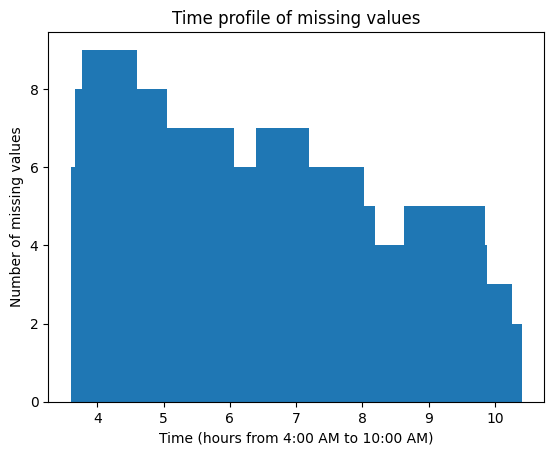

In [11]:
# Calculate the number of missing values per 1-minute interval
nans_per_time = np.sum(np.isnan(vectorized_day_dataset), axis=0)
print(nans_per_time.shape)  # Ensure this is (360,)

# Define the number of 1-minute intervals between 4:00 AM and 10:00 AM
nintvals = 361  # 6 hours * 60 minutes = 360 intervals

# Create an array 'x_axis' representing the 1-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)

# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []

# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
    x_axis_hours.append(4 + float(x_axis[i]) / 60)  # Start at 4 AM, and each interval is 1 minute

# Plot the number of missing values over time
fig, ax = plt.subplots()
ax.bar(x_axis_hours, height=nans_per_time)

# Set labels and title
ax.set_ylabel('Number of missing values')
ax.set_xlabel('Time (hours from 4:00 AM to 10:00 AM)')
ax.set_title('Time profile of missing values')

# Display the plot
plt.show()

In [12]:
# Convert the array to a pandas DataFrame to make use of pandas' interpolation function
vectorized_day_df = pd.DataFrame(vectorized_day_dataset)

# Apply linear interpolation to each column (time interval)
# 'axis=1' means interpolation is done across each row (for each day)
vectorized_day_interpolated = vectorized_day_df.interpolate(method='linear', axis=1, limit_direction='both')

# Convert the DataFrame back to a NumPy array if needed
vectorized_day_dataset_interpolated = vectorized_day_interpolated.to_numpy()
vectorized_day_dataset = vectorized_day_dataset_interpolated

# Print the interpolated data
print(vectorized_day_dataset)
print(vectorized_day_dataset.shape)

[[29. 26. 38. ... 60. 46. 68.]
 [29. 23. 29. ... 54. 59. 59.]
 [37. 35. 36. ... 57. 40. 53.]
 ...
 [ 1.  6.  3. ... 50. 47. 45.]
 [ 6.  3.  6. ... 42. 46. 62.]
 [ 2.  3.  1. ... 24. 14. 16.]]
(211, 361)


In [13]:
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))

number of days with missing value 0


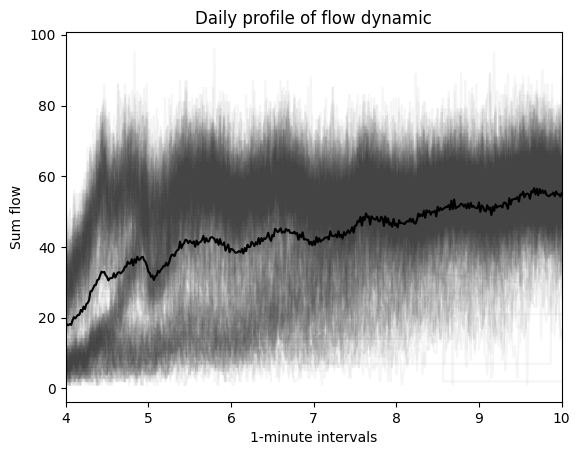

In [14]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()# a convenient way to create a new figure and a set of subplots.
ax.plot(np.array([x_axis_hours,]*ndays).transpose(),vectorized_day_dataset.transpose(),color='#444444',alpha=0.05)
# Above line plots the dataset with specified color and transparency.
ax.plot(x_axis_hours,np.transpose(np.nanmean(vectorized_day_dataset,0)),color='black')
# Above line plots the average of the dataset in black color.

ax.set_ylabel('Sum flow')
ax.set_xlabel('1-minute intervals')
plt.xlim(4,10)
ax.set_title('Daily profile of flow dynamic')

plt.show()

In [33]:
import datetime

# Create an array 'day_of_week' to store the day of the week for each unique date
day_of_week = np.zeros((ndays))

# Loop through each unique date
for i in range(0, ndays):
    # Parse the current date from a string to a datetime object
    day_dt = datetime.datetime.strptime(str(days[i]), '%Y%m%d')

    # Get the day of the week (1 for Monday, 2 for Tuesday, ..., 7 for Sunday)
    day_of_week[i] = day_dt.isoweekday()

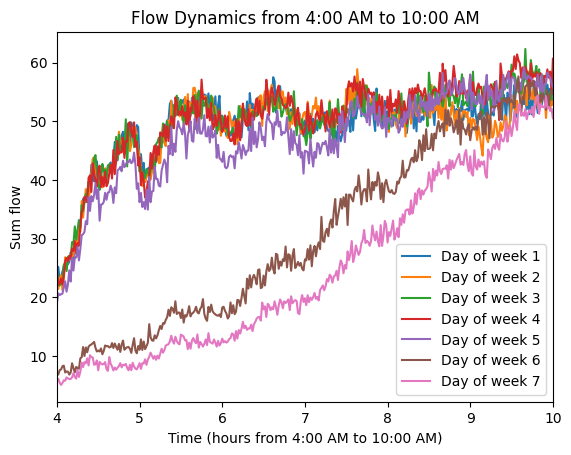

In [34]:
# Define the number of 1-minute intervals between 4:00 AM and 10:00 AM
nintvals = 361  # 6 hours * 60 minutes + 1 extra interval = 361 intervals

# Create an array 'x_axis_hours' representing time in hours from 4:00 AM to 10:00 AM
# Use linspace to generate exactly 361 time points between 4 and 10
x_axis_hours = np.linspace(4, 10, nintvals)

# Create a new figure and axis object using subplots
fig, ax = plt.subplots()

# Iterate through each day of the week (from 1 to 7)
for i in range(1, 8):
    # Find the indices of days that correspond to the current day of the week
    day_of_week_index_t = np.where(day_of_week == i)

    # Calculate the number of days that match the current day of the week
    ndays_t = np.size(day_of_week_index_t[0])

    # Plot the average flow for the current day of the week
    ax.plot(x_axis_hours,  # Plot using the full 361 intervals
            np.nanmean(vectorized_day_dataset[day_of_week_index_t[0], :nintvals].transpose(), 1),
            label='Day of week ' + str(i))

# Set the y-axis label
ax.set_ylabel('Sum flow')

# Set the x-axis label
ax.set_xlabel('Time (hours from 4:00 AM to 10:00 AM)')

# Set the x-axis limits to be between 4 and 10
plt.xlim(4, 10)

# Set the title of the plot
ax.set_title('Flow Dynamics from 4:00 AM to 10:00 AM')

# Add a legend indicating the day of the week
ax.legend()

# Display the plot
plt.show()

In [35]:
from dateutil.relativedelta import relativedelta
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib import colors

def assign_colors(n_clusters, days, assigments):

    days_colors = []
    color_to_cluster = []
    style_to_cluster = []
    weekend_colors = ['#67001f','#d6604d','#fdae61','#f46d43','#d53e4f','#9e0142','#f768a1','#f1c232']#,'#fe9929','#cc4c02','#e31a1c','#737373','#bdbdbd','#252525','#bcbddc']
#    weekend_school_colors = ['#c2a5cf','#f1b6da','#8e0152','#c51b7d','#de77ae','#ae017e','#fcc5c0','#e31a1c','#737373','#bdbdbd']
#    bank_holidays_colors = ['#543005','#dfc27d','#bf812d','#8c510a']
    mixed_colors = ['#4d4d4d','#35978f','#bababa','#878787']
    weekday_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#cab2d6','#6a3d9a','#b15928','#8dd3c7','#bebada','#fb8072','#b3de69','#bc80bd','#fccde5','#ccebc5','#35978f','#80cdc1']

    cluster_id_weekdays_share = []
    cluster_id_weekend_share = []
    cluster_id_all_days = []

    for i in range(0,n_clusters):
        color_to_cluster.append(None)
        style_to_cluster.append(None)
        cluster_id_weekdays_share.append(0)
        cluster_id_weekend_share.append(0)
        cluster_id_all_days.append(0)

    for i in range(0,len(days)):
        #print(i,assigments[i],len(assigments),len(cluster_id_all_days))
        if assigments[i] is not None:
            cluster_id_all_days[assigments[i]] += 1
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')

            if int(pomT.weekday()) < 5:
                cluster_id_weekdays_share[assigments[i]] += 1
            else:
                cluster_id_weekend_share[assigments[i]] += 1

    print('cluster_id_weekdays_share',cluster_id_weekdays_share)
    print('cluster_id_weekend_share',cluster_id_weekend_share)
    for i in range(0,len(days)):
        if assigments[i] is not None:
            cluster_idx = assigments[i]
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
            if color_to_cluster[assigments[i]] is None:
                if cluster_id_weekend_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekend_colors.pop()
                        style_to_cluster[assigments[i]] = ':'
                elif cluster_id_weekdays_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekday_colors.pop(0)
                        style_to_cluster[assigments[i]] = '-'
                else:
                    color_to_cluster[assigments[i]] = mixed_colors.pop()
                    style_to_cluster[assigments[i]] = ':'

            days_colors.append(color_to_cluster[assigments[i]])
        else:
            days_colors.append(None)

    return days_colors,color_to_cluster,style_to_cluster


def calmap(ax, year, data, days, assigments, n_clusters,days_colors,color_to_cluster,
           limit_graphics=False):

    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders

    xticks, labels = [], []
    start = datetime.datetime(year,1,1).weekday()

    for month in range(1,13):

        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]

        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",

                       linewidth=1, zorder=20, clip_on=False)

        ax.add_artist(poly)

    line = Line2D([0,53],[5,5],linewidth=1, zorder = 20,color="black",linestyle='dashed')
    ax.add_artist(line)

    if not limit_graphics:
        ax.set_xticks(xticks)
        ax.set_xticklabels(labels)
        ax.set_yticks(0.5 + np.arange(7))
        ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
        ax.set_title("{}".format(year), weight="semibold")
    else:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        plt.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=False,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=False)

    # Clearing first and last day from the data
    valid = datetime.datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime.datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    for i in range(0,len(days)):
        if '-' in str(days[i]):
            pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
        else:
            pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
        week_number = int(pomT.strftime("%W"))
        day_of_week = int(pomT.weekday())
        data[day_of_week,week_number] = assigments[i]


    act_date = datetime.datetime(year,1,1)
    while (act_date.year == year):

        week_number = int(act_date.strftime("%W"))
        day_of_week = int(act_date.weekday())
        doy_id = act_date.timetuple().tm_yday
        if doy_id<5 and week_number > 53:
            week_number = 0

        act_date = act_date + datetime.timedelta(days=1)

    #pomT = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
    #week_number = int(pomT.strftime("%V"))
    #day_of_week = int(pomT.weekday())
    #print(week_number,day_of_week)
    #doy_id = pomT.timetuple().tm_yday
    #if doy_id<5 and week_number > 0:
    #    week_number = 0
    #data[day_of_week,week_number] = len(clusters)+10

    # Showing data
    cmap = plt.cm.spring  # Can be any colormap that you want after the cm
    cmap.set_bad(color='white')

    #ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=0, vmax=len(clusters)+10,
    #          cmap=cmap, origin="lower", alpha=.75)

    cmap = colors.ListedColormap(color_to_cluster)
    bounds=[-0.1]
    step = 1
    for i in range(0,n_clusters):
        bounds.append(i-0.1+step)
    norm = colors.BoundaryNorm(bounds, cmap.N)
    #print(color_to_cluster)
   #print(bounds)
    #print(norm)

    #print(color_to_cluster)
    #print(bounds)
    #print(cmap)
    #exit(0)

    ax.imshow(data, extent=[0,53,0,7], zorder=10, interpolation='nearest', origin='lower',cmap=cmap, norm=norm)

def make_calendar_visualization_figure(days,assigments,n_clusters,years,days_colors,color_to_cluster,
                                       save_figure: str = None, show_figure:bool = True, limit_graphics = False):

    fig = plt.figure(figsize=(8,1.5*len(years)), dpi=100)
    X = np.linspace(-1,1, 53*7)

    for i, obj in enumerate(years):

        pom_s = str(len(years))+'1'+str(i+1)
        print(pom_s)

        ax = plt.subplot(int(pom_s), xlim=[0, 53], ylim=[0, 7], frameon=False, aspect=1)
        I = 1.2 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
        I = I.reshape(53,7).T
        I.fill(np.nan)
        calmap(ax, int(obj), I.reshape(53,7).T, days, assigments, n_clusters,days_colors,color_to_cluster, limit_graphics)

    #   ax = plt.subplot(212, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #  I = 1.1 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #   calmap(ax, 2018, I.reshape(53,7).T)

    #ax = plt.subplot(313, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #I = 1.0 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #calmap(ax, 2019, I.reshape(53,7).T)
    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()


def make_figure_centroids(x,y,color_to_cluster,style_to_cluster,cluster_ids,minY = None,maxY = None,
                          save_figure: str = None, show_figure:bool = True):

    #print(color_to_cluster)
    fig = plt.figure(figsize=(8,3))
    ax = fig.add_subplot(111)
    for i in range(0,len(x)):
        #print(i,color_to_cluster[i],style_to_cluster[i])
        #print(y[i])
        ax.plot(x[i],y[i],style_to_cluster[i], color=color_to_cluster[i], label=str(cluster_ids[i]))
    ax.set_xlabel('Time of day')
    ax.set_ylabel('Flow')
    if minY is not None and maxY is not None:
        ax.set_ylim([minY, maxY])
    plt.legend()

    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()

In [36]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

#clusters = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(vectorized_day_dataset)

In [39]:
n_clusters = 4
clusters = None
#print(np.where(nans_per_day > 0)[0])
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
days_not_nans = days[np.where(nans_per_day == 0)[0]]

# BELOW lines enables you to comment in and out clustering method you want to use note that GMM have different ouput and thus labels are extracted differently
clusters = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#clusters = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean', linkage='ward').fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#clusters = DBSCAN(eps=500, min_samples = 2).fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

if clusters is not None:
  cluster_labels = clusters.labels_

#cluster_labels = GaussianMixture(n_components=n_clusters).fit(vectorized_day_dataset_no_nans).predict(vectorized_day_dataset_no_nans) #check the parameters at  https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_init.html#sphx-glr-auto-examples-mixture-plot-gmm-init-py


print(cluster_labels)


[1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 3 0 1 1 1 1 1 0 0 3 1 0
 1 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 0 0 0 2 2 2 2 0 0 1 1 1 1 2 0
 0 1 1 1 1 1 0 3 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 1 1 1 0 2 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 3 2 2 0 2 2 0 3 2 2 2 2 2 0 3 2 2 2 2 2 0 3 2 2 2 2 2 0 3 2 2 2 2 2 3 3
 2 2 2 2 2 3 3 2 2 2 2 2 3 3 2 2 2 0 3 3 3 0 0 0 0 3]


cluster_id_weekdays_share [11, 81, 58, 3]
cluster_id_weekend_share [43, 0, 0, 15]
111


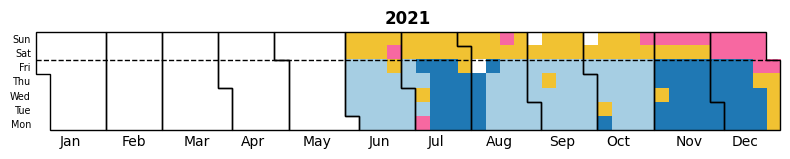

In [40]:
# Calculate the number of clusters by finding unique values in 'cluster_labels'
n_clusters_t = len(np.unique(cluster_labels))

# Assign colors to days based on clusters
days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters_t, days_not_nans, cluster_labels)
# The function 'assign_colors' is used to determine colors and styles for visualization.

# Create a calendar visualization figure
make_calendar_visualization_figure(days_not_nans, cluster_labels, n_clusters_t, [2021], days_colors,
                                   color_to_cluster, save_figure=None)
# This function 'make_calendar_visualization_figure' is used to generate a visualization based on the provided data and parameters.
# 'days_not_nans' are the days, 'cluster_labels' are the cluster labels, 'n_clusters_t' is the number of clusters,
# '[2021]' represents the year, 'days_colors' represent the assigned colors for each day, 'color_to_cluster' maps colors to clusters,
# and 'save_figure' is an optional parameter to save the generated figure (can be None if not saving).

Visualising different culstering classes

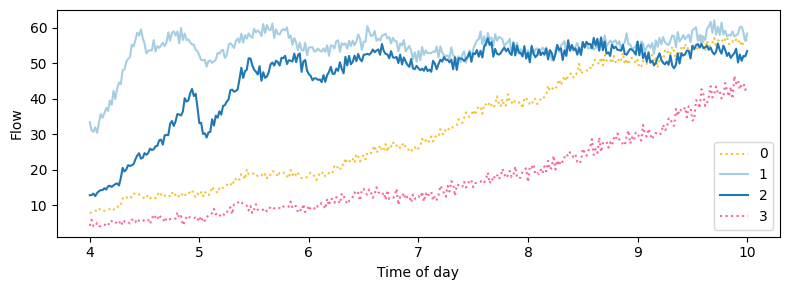

In [41]:
# Initialize empty lists to store centroid data
centroids_xx = []  # x-axis values for centroids
centroids_yy_daytypes = []  # y-axis values for centroids, grouped by day types
cluster_ids = []  # Cluster IDs

# Iterate through each cluster
for i in range(0, n_clusters_t):
    # Store the x-axis values for centroids (hours of the day)
    centroids_xx.append(x_axis_hours)

    # Calculate the y-axis values for centroids (average flow for each 5-minute interval)
    centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())
    centroids_yy_daytypes.append(centroid_yy)

    # Store the cluster ID
    cluster_ids.append(i)

# Generate a figure displaying the centroids
make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)
# The function 'make_figure_centroids' is used to create a visualization of the centroids,
# with the provided data and parameters.

时间序列进行预测----xgboost prediction

分离每个聚类的数据，分为类1234，input是30分钟前的30个数据，output是下一分钟的数据，将新预测作为已知数据，逐步预测15分钟的值


In [42]:
print(vectorized_day_dataset)  #not yet take the clustering into consideration

[[29. 26. 38. ... 60. 46. 68.]
 [29. 23. 29. ... 54. 59. 59.]
 [37. 35. 36. ... 57. 40. 53.]
 ...
 [ 1.  6.  3. ... 50. 47. 45.]
 [ 6.  3.  6. ... 42. 46. 62.]
 [ 2.  3.  1. ... 24. 14. 16.]]


需要把数据分割成x-30个值，y-下一分钟的值 （可以考虑用昨天的值预测今天的值）

记得划分为训练集验证集



将数组分为x和y，x为30输入，y为一分钟预测

In [43]:
import numpy as np

arr = vectorized_day_dataset
print(arr.shape)
rows, columns = arr.shape

x = []
y = []

# Number of input data
lag_size = 30

# 遍历数组，除了最后 lag_size 个元素
for i in range(rows):
  for j in range(columns - lag_size):
    # 对于每个时间步长，创建一个包含前 lag_size 个元素的 x 特征数组
    x_features = arr[i][j:j+lag_size].flatten()
    # y 是当前时间步长的数据
    y_value = arr[i][j+lag_size]
    # 将它们添加到相应的列表中
    x.append(x_features)
    y.append(y_value)

# translate it to NumPy array
x = np.array(x)
y = np.array(y)
np.set_printoptions(threshold=1000, edgeitems=3)

print(x)
print(x.shape)
print(y)
print(y.shape)

(211, 361)
[[29. 26. 38. ... 56. 65. 46.]
 [26. 38. 34. ... 65. 46. 61.]
 [38. 34. 29. ... 46. 61. 53.]
 ...
 [17. 22. 17. ... 29. 21. 35.]
 [22. 17. 18. ... 21. 35. 24.]
 [17. 18. 27. ... 35. 24. 14.]]
(69841, 30)
[61. 53. 49. ... 24. 14. 16.]
(69841,)


tran test split ----test size 0.2

In [49]:
test_size = 0.2

x_train = x[:int(len(x)*(1-test_size))]
x_test = x[int(len(x)*(1-test_size)):]
y_train = y[:int(len(y)*(1-test_size))]
y_test = y[int(len(y)*(1-test_size)):]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(55872, 30)
(13969, 30)
(55872,)
(13969,)


In [51]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
scaler = StandardScaler()  #standardize it
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

xgb = XGBRegressor()
xgb.fit(x_train_scaled, y_train)
y_pred = xgb.predict(x_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 5.836151412335708
Mean Squared Error: 58.745069009430445
R-squared: 0.8409271457662386
